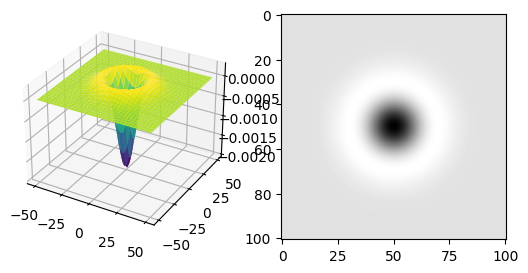

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2 as cv

sigma = 10
hw = 50
x = np.linspace(-hw, hw, 2*hw+1)
y = np.linspace(-hw, hw, 2*hw+1)
X, Y = np.meshgrid(x, y)

G = 1/(2*np.pi*sigma**2) * np.exp(-(X**2 + Y**2)/(2*sigma**2))

# Partial derivatives in x
Gx = cv.Sobel(G, cv.CV_64F, 1, 0)
Gy = cv.Sobel(G, cv.CV_64F, 0, 1)

Gxx = cv.Sobel(Gx, cv.CV_64F, 1, 0)
Gyy = cv.Sobel(Gy, cv.CV_64F, 0, 1)

L = Gxx + Gyy

# Plot in 3-D
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, L, cmap='viridis')
ax = fig.add_subplot(122)
ax.imshow(L, cmap='gray')
plt.show()

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('store/store_shelf.png', cv.IMREAD_REDUCED_COLOR_2)
assert image is not None
template = cv.imread('store/oat_crunch.jpg', cv.IMREAD_REDUCED_COLOR_2)
assert template is not None

sift = cv.SIFT_create()
kp1, des1 = sift.detectAndCompute(image, None)
kp2, des2 = sift.detectAndCompute(template, None)

In [6]:
kp1_ = np.array([kp.pt for kp in kp1])
kp1_

array([[  3.02846122,   3.14896536],
       [  3.08591604, 227.31863403],
       [  3.44218707, 208.98756409],
       ...,
       [555.35906982,  56.38405991],
       [555.62432861,  79.00154114],
       [556.01379395, 116.78869629]])

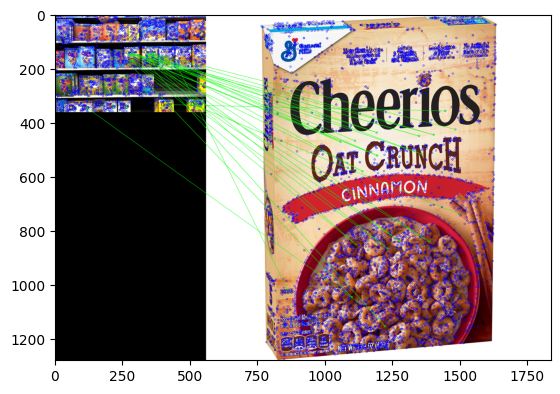

In [11]:
FLANN_Index_KDTREE = 1
index_params = dict(algorithm=FLANN_Index_KDTREE, trees=5)
search_params = dict(checks=50) # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0, 0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i] = [1, 0]

draw_params = dict(matchColor=(0, 255, 0),singlePointColor=(255, 0, 0),matchesMask=matchesMask,flags=cv.DrawMatchesFlags_DEFAULT)
img3 = cv.drawMatchesKnn(image, kp1, template, kp2, matches, None, **draw_params)
plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
plt.show()

In [12]:
des1.shape, des2.shape

((2409, 128), (5864, 128))

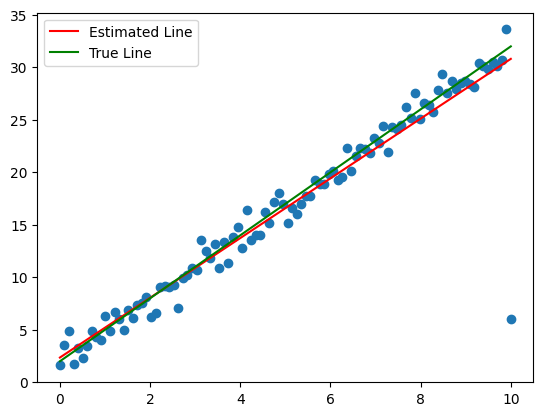

In [17]:
# Least squares line fitting

m, b = 3,2
n = 100

x = np.linspace(0, 10, n)
y = m*x + b + np.random.normal(0, 1, n)
y[-1] = 6 # outlier

X = np.vstack([x, np.ones(n)]).T
B = np.linalg.inv(X.T @ X) @ X.T @ y

m_est = B[0]
b_est = B[1]

plt.plot(x, y, 'o')
plt.plot(x, m_est*x + b_est, color='red', label='Estimated Line')
plt.plot(x, m*x + b, color='green', label='True Line')
plt.legend()
plt.show()